# Identify Fraud from Enron Email
by: Yasirah Krueng


## Free-Response Questions

In [1]:
import poi_id as poi

C:\ProgramData\Anaconda3\envs\DAND\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Preparing POI identifier...
Tuning different classifiers...
Tuning time:
    - GaussianNB               :  0.22s
    - DecisionTreeClassifier   :  0.16s
    - RandomForestClassifier   :  2.37s
    - AdaBoostClassifier       :  4.53s
    - Final Identifier         :  0.61s
Finished loading in 7.93s



** _1. Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those? [relevant rubric items: "data exploration", "outlier investigation"]_**

The goal of this project is to build a person of interest identifier based on financial and email data made public as a result of the Enron scandal. A person of interest is an individual who was indicted, reached a settlement of plea deal with the government, or testified in exchange for prosecution immunity. Machine learning is useful in trying to accomplish this goal because it can utilize the significant amount of typically confidential information of top Enron's excecutives that entered into the public record, including tens of thousands of emails and detailed financial data for top executives. A machine learning model will categorize the data, find trends in them, and apply these information to new datasets.   

### Data Exploration

#### Data Overview

**Data Features**

There are 17 features available in the dataset:

In [2]:
poi.print_data_features(poi.available_features)

- salary
- to_messages
- deferral_payments
- exercised_stock_options
- bonus
- restricted_stock
- shared_receipt_with_poi
- restricted_stock_deferred
- expenses
- loan_advances
- from_messages
- other
- from_this_person_to_poi
- director_fees
- deferred_income
- long_term_incentive
- from_poi_to_this_person


The graph below shows the percentage of missing value in each features:

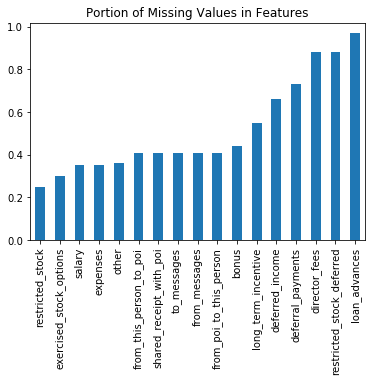

In [3]:
poi.plot_nan_features()

In the next question, I'll come back to this plot and explain what I did to features with too many missing values.

** Data Points**

There are 146 original data points available in the dataset. There are only 18 POI (about 12% of data points) out of 35 POI (listed in poi_names.txt) in the dataset. It will become a challenge in validation process and will be address in question number 5 about validation.

There are also many missing values in each data points. Here are some data points with the most missing values:

In [4]:
poi.print_nan_datapoints(min_nan=15)

Name                           Missing Values out of 17 features.
WODRASKA JOHN                 : 16
WHALEY DAVID A                : 16
WROBEL BRUCE                  : 16
LOCKHART EUGENE E             : 17
THE TRAVEL AGENCY IN THE PARK : 16
SCRIMSHAW MATTHEW             : 16
GRAMM WENDY L                 : 16


Notice that **'THE TRAVEL AGENCY IN THE PARK'** is not a person name, so we cannot identify it as a POI, thus this data point needs to be removed from the dataset.

**Data Outliers**

- Bonus outliers:

In [5]:
poi.print_outliers('bonus')

MCMAHON JEFFREY               :    2600000
KITCHEN LOUISE                :    3100000
LAVORATO JOHN J               :    8000000
WHALLEY LAWRENCE G            :    3000000
DELAINEY DAVID W              :    3000000
LAY KENNETH L                 :    7000000
BELDEN TIMOTHY N              :    5249999
SKILLING JEFFREY K            :    5600000
TOTAL                         :   97343619
ALLEN PHILLIP K               :    4175000
FALLON JAMES B                :    2500000


- Salary ouliers:

In [6]:
poi.print_outliers('salary')

WHALLEY LAWRENCE G            :     510364
LAY KENNETH L                 :    1072321
SKILLING JEFFREY K            :    1111258
PICKERING MARK R              :     655037
TOTAL                         :   26704229
DERRICK JR. JAMES V           :     492375
FREVERT MARK A                :    1060932


There many outliers in bonus and salary features, and one of them is from an invalid data point due to table conversion. The invalid data point is 'TOTAL' and it should be removed from the dataset.

Notice that after removing 'THE TRAVEL AGENCY IN THE PARK' and 'TOTAL', there are only 144 data points left in the dataset.

Here's the scatter plot of salary vs. bonus in the initial dataset:

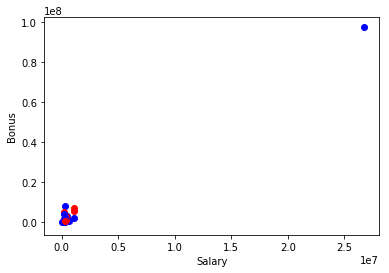

In [7]:
poi.plot_poi_scatter(poi.data_dict, x_label = "Salary", y_label = "Bonus")

And here's the scatter plot of salary vs. bonus after outliers removal:

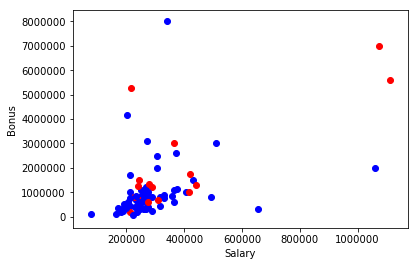

In [8]:
poi.plot_poi_scatter(poi.my_dataset, x_label = "Salary", y_label = "Bonus")

Though there are still some outliers left after removing 'TOTAL' and 'THE TRAVEL AGENCY IN THE PARK', but those outliers are valid data points and should be kept in the dataset.

**_2. What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer you own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection funcion like SelectKBest, please report the feature scores and reasons for your choice of parameter values. [relevant rubric items: "create new features", "intelligently select features", "properly scale features"]_**

I ended up using 3 original features and 3 newly engineered features, in my POI identifier. Those features are:

**Original Features**:
- deferred_income
- expenses
- other

**New Features**:
- bonus_fraction : a fraction of bonus to the salary, which might be more useful than simply bonus, because a higher bonus-fraction might indicate fraud or bribery.
- from_poi_fraction : a fraction of the number of e-mails received from poi to the number of total e-mails received, which is more telling of how often a person communicate with poi than non-poi in general. 
- to_poi_fraction : a fraction of the number of e-mails sent to poi to the number of total e-mails sent, which is also more telling of how often a person communicate with poi than non-poi in general.

Initially, I only used automated feature selection in my POI identifier using all available financial and email features plus the three new features, but the identifier didn't perform that well on the test, so I tried to look at the features again. I notice that some features, such as loan_advances and director_fees have mostly NaN values as shown on the Portion of Missing Values in Features bar graph above, so I chose not to use these features. After futher manual selection, I ended up with 11 features:

In [9]:
poi.print_data_features(poi.initial_features)

- deferral_payments
- deferred_income
- exercised_stock_options
- expenses
- long_term_incentive
- other
- restricted_stock_deferred
- salary
- bonus_fraction
- from_poi_fraction
- to_poi_fraction


Then, I experimented with automated feature selection using SelectKBest, PCA, and FeatureUnion using both SelectKBest and PCA. I ended up using SelectKBest with k=9 (the best performance after tuning the k parameter). I also experimented with feature scaling using MinMaxScaler and Normalizer, but in doing so, lowered the performance of my identifier. Thus, I decided not to use feature scaling in my final model. Below are the SelectKBest feature scores and DecisionTreeClassifier feature importances using the 11 features above and SelectKBest k=9:

In [10]:
poi.print_kbest_feature_scores(poi.dtree_tuner, 
                               poi.dtree_tuner_selected_features)

Feature Name            Score  P-value
expenses                24.53  0.00
from_poi_fraction       18.00  0.00
exercised_stock_options 11.32  0.00
to_poi_fraction         10.61  0.00
other                   09.77  0.00
long_term_incentive     05.95  0.02
salary                  04.13  0.04
deferred_income         00.23  0.63
bonus_fraction          00.07  0.80



In [11]:
poi.print_dtree_feature_importances(poi.dtree_tuner,
                                    poi.dtree_tuner_selected_features)

Feature Name            Feature Importance
other                    0.44
expenses                 0.25
to_poi_fraction          0.09
bonus_fraction           0.08
from_poi_fraction        0.08
deferred_income          0.07
exercised_stock_options   0.0
long_term_incentive       0.0
salary                    0.0



Based on feature importances above, I selected only features with importance value greater than 0 to be in my final features list, giving me the 6 final features in the list. After another parameter tuning, I got the best performance from SeleckKBest k=6 using DecisionTreeClassifier with the following feature scores and importances: 

** Final Identifier SelectKBest Feature Scores **

In [12]:
poi.print_kbest_feature_scores(poi.clf_tuner, 
                               poi.clf_tuner_selected_features)

Feature Name            Score  P-value
to_poi_fraction         12.41  0.00
deferred_income         09.01  0.00
bonus_fraction          07.73  0.01
expenses                03.66  0.06
other                   03.15  0.08
from_poi_fraction       01.89  0.17



** Final Identifier DecisionTreeClassifier Feature Importances **

In [13]:
poi.print_dtree_feature_importances(poi.clf_tuner,
                                    poi.clf_tuner_selected_features)

Feature Name            Feature Importance
other                    0.39
expenses                 0.27
to_poi_fraction          0.11
from_poi_fraction        0.08
deferred_income          0.08
bonus_fraction           0.08



**_3. What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms? [relevant rubric item: "pick an algorithm"]_**

I ended up using a DecisionTreeClassifier and I also experimented with GaussianNB, RandomForestClassifier, and AdaBoostClassifier with a DecisionTreeClassifier base estimator. While RandomForestClassifier gives the best accuracy and precision scores, it has bad F1 and recall scores. GaussianNB performs better than RandomForestClassifier in this project with better F1, and recall scores. AdaBoostClassifier performs just slighly below the final DecisionTreeClassifier. Additionally, the times to train and test different classifiers were different too. GaussianNB and DecisionTreeClassifier were fast but AdaBoostClassifier and RandomForestClassifier were slower as shown on the test scores below:

In [14]:
poi.print_test_scores()

******************
*** GaussianNB ***
******************

Pipeline(memory=None,
     steps=[('feature_selection', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kbest', SelectKBest(k=8, score_func=<function f_classif at 0x000000000BD67D68>))],
       transformer_weights=None)), ('clf', GaussianNB(priors=None))])
	Accuracy: 0.86780	Precision: 0.50528	Recall: 0.40700	F1: 0.45084	F2: 0.42347
	Total predictions: 15000	True positives:  814	False positives:  797	False negatives: 1186	True negatives: 12203

Testing time: 2.75s

******************************
*** RandomForestClassifier ***
******************************

Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=9, score_func=<function f_classif at 0x000000000BD67D68>)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_

And this is the test score for the final POI identifier using DecisionTreeClassfier:

In [15]:
poi.print_test_scores(final=True)

************************************************
*** Final Classifier: DecisionTreeClassifier ***
************************************************

Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=6, score_func=<function f_classif at 0x000000000BD67D68>)), ('clf', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=24,
            splitter='best'))])
	Accuracy: 0.81085	Precision: 0.42028	Recall: 0.60500	F1: 0.49600	F2: 0.55612
	Total predictions: 13000	True positives: 1210	False positives: 1669	False negatives:  790	True negatives: 9331

Testing time: 1.58s


**_4. What does it mean to tune the parameters of an algorithm, and what can happen if you don't do this well? How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice of a different model that does utilize parameter tuning, e.g. a decision tree classifier). [relevant rubric items: "discuss parameter tuning", "tune the algorithm"]_**

To tune the parameters of an algorithm is basically to experiment with the values of each parameters of an algorithm in order to come up with a combination of values which optimized its performance. If it was not done well, one might ended up with an under performed algorithm. I tuned the parameters of my algorithm using GridSearchCV on a three-step Pipeline, a feature scaling (optional - final identifier did not use feature scaling), a feature selection, and a classifier step. On feature selection, I tuned the k parameter on SelectKBest, and n_components on PCA. On classifier, I tuned the min_samples_leaf, max_depth, and class_weight of DecisionTreeClassifier. I also tuned some parameters of the RandomForestClassifier and AdaBoostClassifier. 

** Final Identifier Best Parameters **

In [16]:
poi.print_best_params(poi.clf_tuner)

feature_selection__k     : 6
clf__min_samples_leaf    : 4
clf__max_depth           : 5
clf__class_weight        : balanced


**_5. What is validation, and what's a classic mistake you can make if you do it wrong? How did you validate your analysis? [relevant rubric items: "discuss validation", "validation strategy"]_**

Validation is basically a process where a trained model is being evaluated using test dataset. The classic mistake in this process is using the same dataset used to train the model to evaluate it, which will result in overfitting (high accuracy on train dataset). The challange in the validation process of this project was the small portion of POI in the dataset which made it hard to split the data into train and test data. The approach used to tackle this issue was using the Stratified Shuffle Split cross validation which is ideal for a small and uneven dataset.

**_6. Give at least 2 evaluation metrics and your average performance for each of them. Explain an interpretation of your metrics that says something human-understandable about your algorithm's performance. [relevant rubric item: "usage of evaluation metrics"]_**

The main evaluation metrics used in this project are F1, recall, and precision. The average F1, recall, and precision score for my final POI identifier are 0.496, 0.605, and 0.420 respectively. It means that 60.5% actual POI in test case were correctly flagged by the identifier as POI. In another words, if a person in the test set was a real POI, there's a 60.5% chance that the identifier will flagged him/her as a POI. In addition, 42% of person predicted by the identifier as POI were actually true POI. In another words, if a person was identified by the model as a POI, there's a 42% chance that he/she's trully a POI. Based on these scores, we can say that my final identifier is good (realiable) at identifying a POI though it is not as accurate. 